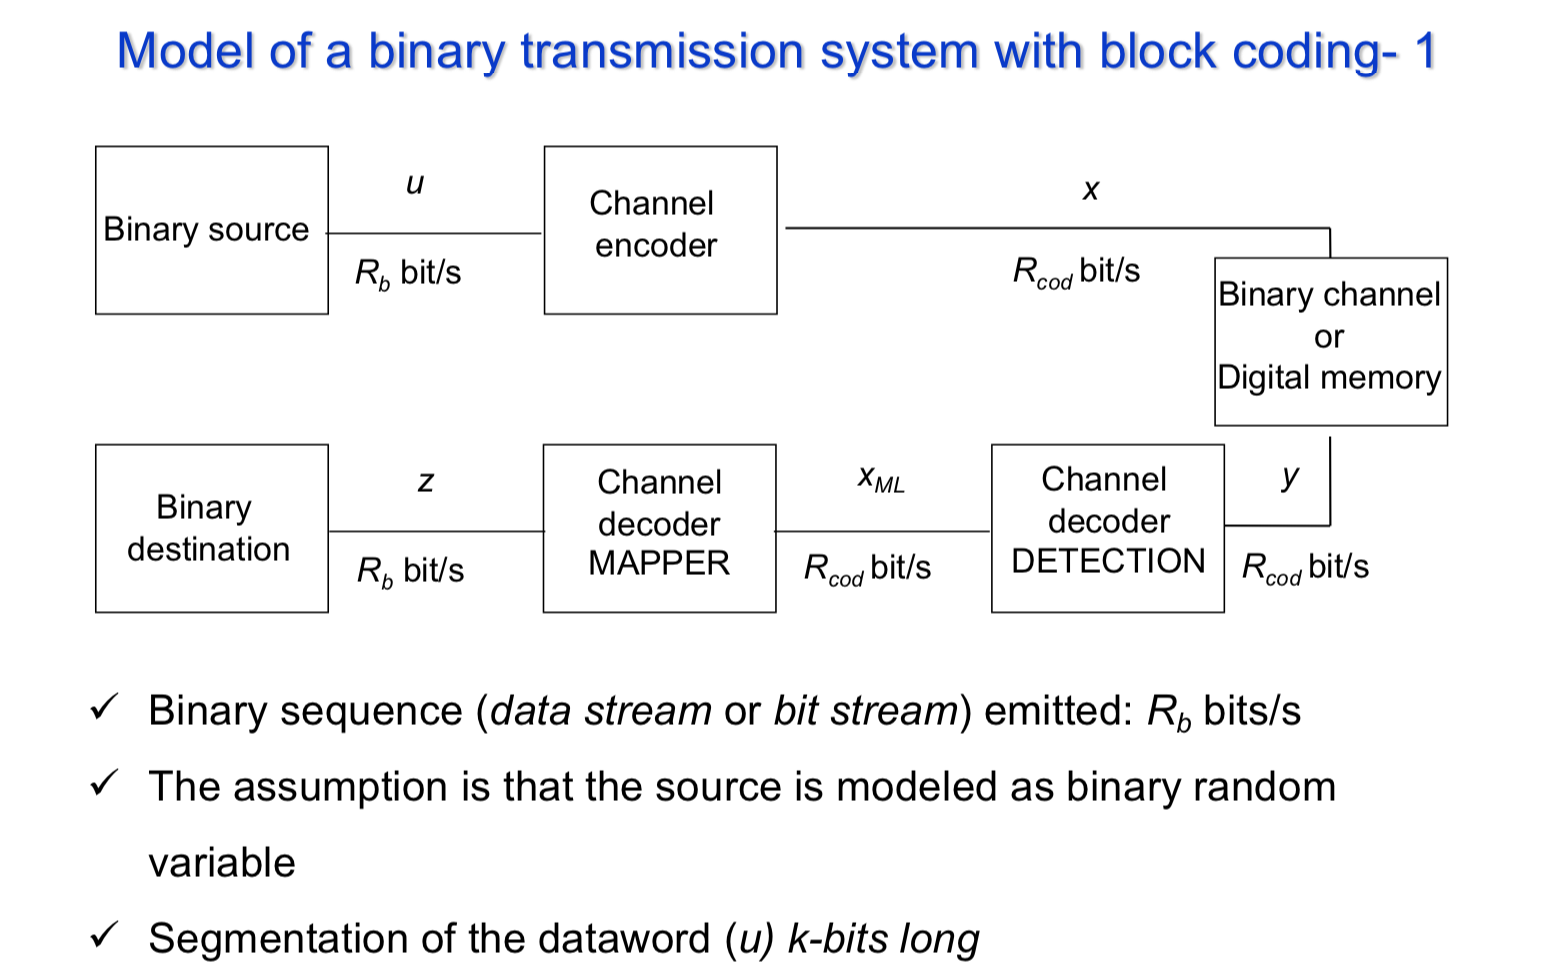

In [1]:
from IPython.display import Image
Image(filename='img.png')

In [2]:
# ENCODER: returns binary source
def binary_encoder(word):
    encoded = bin(int.from_bytes(word.encode(), 'big'))  
    encoded = encoded[0] + encoded[2:]
    return encoded

In [3]:
bin(int.from_bytes('hi'.encode(), 'big'))  

'0b110100001101001'

In [4]:
binary_encoder("hello")

'0110100001100101011011000110110001101111'

In [5]:
binary_encoder("hi")

'0110100001101001'

In [6]:
# DECODER 

def binary_decoder(bits):
    msg = int('0b' + str(bits), 2)
    return msg.to_bytes((msg.bit_length() + 7) // 8, 'big').decode()

In [7]:
binary_decoder(binary_encoder('hi'))

'hi'

--------

In [8]:
# converts u into x (include anche la conversione binaria)
def channel_coder(msg, encoding_len=4):
    """
    : Notice: channel_coder include anche il binary_encoding
              cioè da messaggio a binario
              dopo prosegue facendo il channel encoding
    """
    msg = [x for x in str(binary_encoder(msg))]
    
    code = []
    for symbol in msg:
        code += encoding_len*symbol
        
    return ''.join(code)

In [9]:
channel_coder('hi')

'0000111111110000111100000000000000001111111100001111000000001111'

In [10]:
def channel_decoder(msg, decoding_len=4):
    """
    : converte la stringa 111100001111 in 101
    : PROBLEMA: non tiene conto della sequenza dei bit
                cioè: appena conta 4 volte 1, appende 1
                      stessa cosa per zero
                i.e. 11101001111 sarà comunque 101
    
    : OUTPUT
        messaggio binario da decodificare
    """
    from time import sleep
    
    
    code = list(str(msg))
    decoded = []
    
    ones = 0
    zeros = 0
    
    for bit in code:
        if bit == "1":
            ones += 1
        else:
            zeros += 1
        
        
        if ones == decoding_len:
            decoded.append('1')
            ones = 0
            
        if zeros == decoding_len:
            decoded.append('0')
            zeros = 0

    return ''.join(decoded)

In [11]:
# hi 
#'111111110000111100000000000000001111111100001111000000001111'

In [12]:
channel_decoder(channel_coder('hi'))

'0110100001101001'

In [13]:
binary_decoder(channel_decoder(channel_coder('hi')))

'hi'

--------------------

# Proposta:

### Due routine python da pc:

- 1 programma da python legge ogni tot secondi un file di testo 'sender.txt'
    - nel caso trovi il file non vuoto:
        - Lettura testo
        - Conversione in binaria
        - codifica con i.e. 4 bit ( ie: "hi"==101 --> 111100001111)
        - Invio messaggio codificato ad ArduSender
        - Cancellazione messaggio dal file di testo 'sender.txt'
        
        
- 1 programma da python legge ogni tot secondi un file di testo 'receiver.txt'
    - nel caso trovi il file non vuoto:
        - lettura testo
        - controllo errori (i.e. bit corretti ricevuti vs n. bit totali)
        - è possibile fare inferenza su bit mancanti dalla sequenza (se abbiamo errori)?
            - se sì:
                - correzione errori
                - decodifica con i.e. 4 bit
        - Cancellazione messaggio dal file 'receiver.txt'
        
### ArduSender:

- Stato di riposo (aspetta segnale da pc):
    - DOMANDA: è possibile comunicare messaggi di testo all'arduino? 
    - EVENTUALE SOLUZIONE: LO ACCENDIAMO E BASTA, con un messaggio di default
- Invio messaggio:
    - inizia la sequenza di invio:
        (i.e. 5 segnali luminosi)
        aspetta 1/2 secondi (il receiver si sincronizza)

    - invia il messaggio

        
### ArduReceiver:

- Stato di riposo (attendi un segnale dal pin) 
- Inizializzazione:
    - primo messaggio del ArduSender: setta la threshold per 1/0
    - appena arriva il segnale, attendi un tot picchi
    - codifica